In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import numpy as np
import seaborn as sns
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [3]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

try:
    import urllib.request
    data1 = urllib.request.urlopen(url)
except ImportError:
    import urllib
    data1 = urllib.urlopen(url)

data_names_red= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality (0-10)']

data_red = pd.read_csv(data1, sep=";", header=None, skiprows=1)
data_red.columns = data_names_red

display(data_red)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality (0-10)
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

try:
    import urllib.request
    data2 = urllib.request.urlopen(url)
except ImportError:
    import urllib
    data2 = urllib.urlopen(url)

data_names_white= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality (0-10)']

data_white = pd.read_csv(data2, sep=";", header=None, skiprows=1)
data_white.columns = data_names_white

display(data_white)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality (0-10)
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
test1=pd.DataFrame()

test1["White quality"]=data_white["quality (0-10)"]
test1["Red quality"]= data_red["quality (0-10)"]
test1_index = test1.reset_index()
display(test1_index)





,index,White quality,Red quality
0,0,6,5.0
1,1,6,5.0
2,2,6,5.0
3,3,6,6.0
4,4,6,5.0
...,...,...,...
4893,4893,6,NaN
4894,4894,5,NaN
4895,4895,6,NaN
4896,4896,7,NaN


In [6]:
#white wine quality vs alcohol"
reg = linear_model.LinearRegression()
y4 = data_white['quality (0-10)'].values.reshape(-1,1)
x4 = data_white['alcohol'].values.reshape(-1,1)
f = plt.figure(figsize=(10,10))
ax = f.add_subplot (111)
ax.plot(x4,y4,"o")


lr=LinearRegression()
display(x4.shape)
X4 = x4.reshape(-1,1)
fit = lr.fit(X4,y4)

display(fit.coef_)
display(fit.intercept_)

y_pred = fit.predict(X4)
error=y_pred-y4

sse=np.sum(error**2)
rmse=np.sqrt(sse/len(x4))
display("RMSE ="+ str(rmse))
display("SSE=" + str(sse))
display(" y = 0.36 x + 1.875 ")
ax.plot(x4,y_pred, "-")



NameError: name 'linear_model' is not defined

In [ ]:
#red wine quality vs alcohol"
reg = linear_model.LinearRegression()
y5 = data_red['quality (0-10)'].values.reshape(-1,1)
x5 = data_red['alcohol'].values.reshape(-1,1)
f = plt.figure(figsize=(10,10))
ax = f.add_subplot (111)
ax.plot(x5,y5,"o")


lr=LinearRegression()
display(x5.shape)
X5 = x5.reshape(-1,1)
fit = lr.fit(X5,y5)

display(fit.coef_)
display(fit.intercept_)

y_pred = fit.predict(X5)
error=y_pred-y5

sse=np.sum(error**2)
rmse=np.sqrt(sse/len(x5))
display("RMSE ="+ str(rmse))

ax.plot(x5,y_pred, "--")

(6497,)

array([0.32531204])

2.4052686015566556

'RMSE =0.7822620146033993'

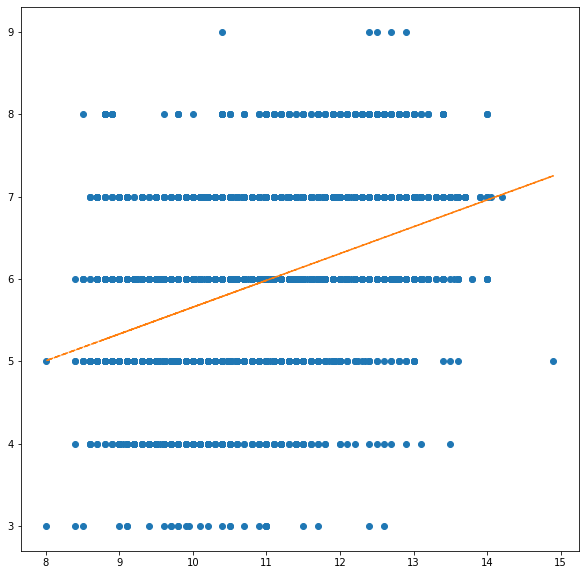

In [14]:
#red and white wine: quality vs alcohol"

df_row = pd.concat([data_white, data_red])
df_row_drop= df_row.dropna(subset=["quality (0-10)"])
y6 = df_row_drop['quality (0-10)'].values
x6 = df_row_drop['alcohol'].values
f = plt.figure(figsize=(10,10))
ax = f.add_subplot (111)
ax.plot(x6,y6,"o")

lr=LinearRegression()
display(x6.shape)
X6 = x6.reshape(-1,1)
fit = lr.fit(X6,y6)

display(fit.coef_)
display(fit.intercept_)

y_pred = fit.predict(X6)
error=y_pred-y6

sse=np.sum(error**2)
rmse=np.sqrt(sse/len(x6))
display("RMSE ="+ str(rmse))

ax.plot(X6,y_pred,  "--")




,age,year,lymph_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


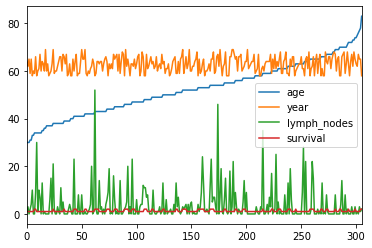

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import numpy as np
import seaborn as sns
sns.set



man_df = pd.read_csv('haberman.csv', header=None, names=['age', 'year', 'lymph_nodes', 'survival'])

display(man_df)
man_df.plot()
plt.show()



,age,year,lymph_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


array([[215,  10],
       [ 67,  14]])

coef : [[ 0.01988257 -0.00975411  0.08838822]], intercept :[-1.86233569]


NameError: name 'x' is not defined

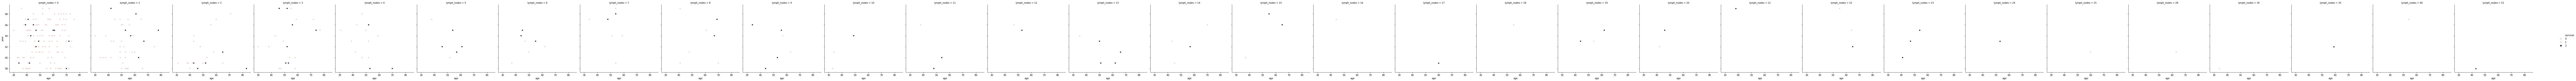

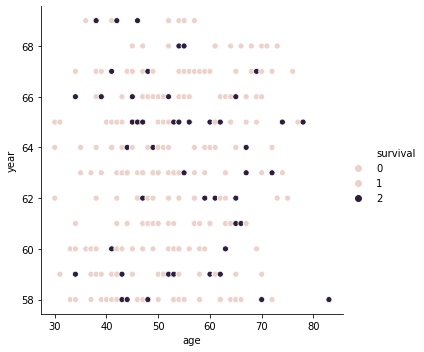

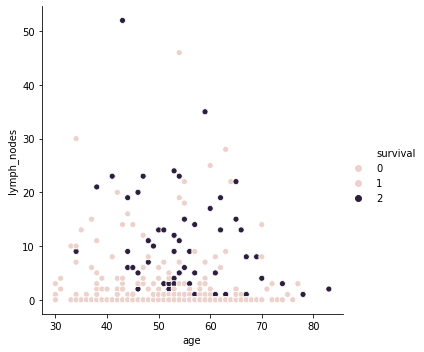

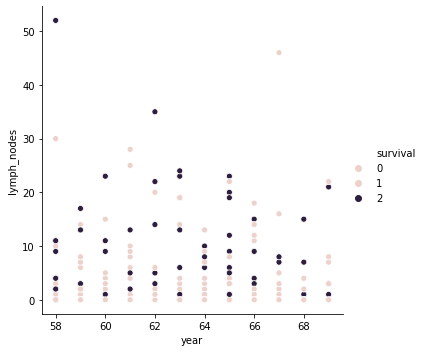

In [21]:

#combination of three factors

x3 = man_df["lymph_nodes"].values
x1 =  man_df["age"].values
x2 =  man_df["year"].values
y = man_df['survival'].values
#plt.plot(x,y,'o')


data = pd.DataFrame({"age":x1,"year":x2,"lymph_nodes":x3,"survival":y})

sns.relplot(data=data, x ="age", y="year",hue="survival",col="lymph_nodes")
sns.relplot(data=data, x ="age", y="year",hue="survival")
sns.relplot(data=data, x ="age", y="lymph_nodes",hue="survival")
sns.relplot(data=data, x ="year", y="lymph_nodes",hue="survival")

target_columns="survival"
X=data.drop(columns=target_columns)
y =data[target_columns]
display(data)


log_reg = LogisticRegression(solver="lbfgs")
fit = log_reg.fit(X,y)
y_pred= log_reg.predict(X)

display(confusion_matrix(y,y_pred))
print("coef : "+ str(log_reg.coef_)+", intercept :"+ str(log_reg.intercept_));


incorrect = data [y_pred !=y]
error=y_pred-y

sse=np.sum(error**2)
rmse=np.sqrt(sse/len(x))
display("RMSE ="+ str(rmse))

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
display("R_squared ="+ str(r_squared))



,x,y
0,30,1
1,30,1
2,30,1
3,31,1
4,31,1
...,...,...
301,75,1
302,76,1
303,77,1
304,78,2


array([[225,   0],
       [ 81,   0]])

coef : [[0.01426352]], intercept :[-1.77541715]


'RMSE =0.5144957554275266'

'R_squared =0.004617246585943452'

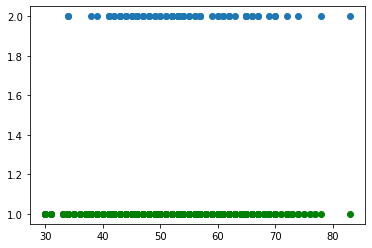

In [28]:
#AGE VS SURVIVAL


x =  man_df["age"].values
y = man_df['survival'].values


plt.plot(x,y,'o')


data = pd.DataFrame({"x":x,"y":y})
target_columns="y"
X=data.drop(columns=target_columns)
y =data[target_columns]
display(data)

log_reg = LogisticRegression(solver="lbfgs")
fit = log_reg.fit(X,y)
y_pred= log_reg.predict(X)

display(confusion_matrix(y,y_pred))
print("coef : "+ str(log_reg.coef_)+", intercept :"+ str(log_reg.intercept_));


incorrect = data [y_pred !=y]
error=y_pred-y

sse=np.sum(error**2)
rmse=np.sqrt(sse/len(x))
display("RMSE ="+ str(rmse))

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
display("R_squared ="+ str(r_squared))
plt.plot(X,y_pred,'go')




,x,y
0,64,1
1,62,1
2,65,1
3,59,1
4,65,1
...,...,...
301,62,1
302,67,1
303,65,1
304,65,2


array([[225,   0],
       [ 81,   0]])

coef : [[-0.01622604]], intercept :[-0.00026302]


'RMSE =0.5144957554275266'

'R_squared =2.273554214469711e-05'

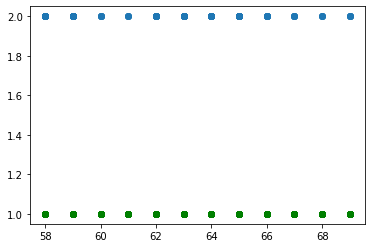

In [27]:
# Year VS SURVIVAL


x =  man_df["year"].values
y = man_df['survival'].values


plt.plot(x,y,'o')


data = pd.DataFrame({"x":x,"y":y})
target_columns="y"
X=data.drop(columns=target_columns)
y =data[target_columns]
display(data)

log_reg = LogisticRegression(solver="lbfgs")
fit = log_reg.fit(X,y)
y_pred= log_reg.predict(X)

display(confusion_matrix(y,y_pred))
print("coef : "+ str(log_reg.coef_)+", intercept :"+ str(log_reg.intercept_));


incorrect = data [y_pred !=y]
error=y_pred-y

sse=np.sum(error**2)
rmse=np.sqrt(sse/len(x))
display("RMSE ="+ str(rmse))

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
display("R_squared ="+ str(r_squared))
plt.plot(X,y_pred,'go')

,x,y
0,1,1
1,3,1
2,0,1
3,2,1
4,4,1
...,...,...
301,1,1
302,0,1
303,3,1
304,1,2


array([[216,   9],
       [ 69,  12]])

coef : [[0.08574222]], intercept :[-1.41234618]


'RMSE =0.5048781642974013'

'R_squared =0.08223563755101745'

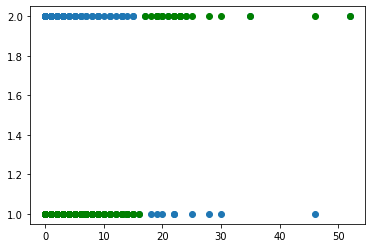

In [26]:
# lymph_nodes VS SURVIVAL


x =  man_df["lymph_nodes"].values
y = man_df['survival'].values


plt.plot(x,y,'o')


data = pd.DataFrame({"x":x,"y":y})
target_columns="y"
X=data.drop(columns=target_columns)
y =data[target_columns]
display(data)


log_reg = LogisticRegression(solver="lbfgs")
fit = log_reg.fit(X,y)
y_pred= log_reg.predict(X)

display(confusion_matrix(y,y_pred))
print("coef : "+ str(log_reg.coef_)+", intercept :"+ str(log_reg.intercept_));


incorrect = data [y_pred !=y]
error=y_pred-y

sse=np.sum(error**2)
rmse=np.sqrt(sse/len(x))
display("RMSE ="+ str(rmse))

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
display("R_squared ="+ str(r_squared))
plt.plot(X,y_pred,'go')

,age,year,lymph_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


[[ 0.08578663 -0.00428001]],[-1.14352196]


array([[216,   9],
       [ 69,  12]])

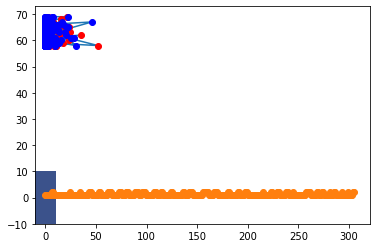

In [44]:
# TEST
%reset -f
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import numpy as np
import seaborn as sns
sns.set

man_df = pd.read_csv('haberman.csv', header=None, names=['age', 'year', 'lymph_nodes', 'survival'])

display(man_df)

x1 =  man_df["lymph_nodes"].values
x2 =  man_df["year"].values
y = man_df['survival'].values


plt.plot(x1,x2, y,'o')
df=pd.DataFrame({"x1":x1,"x2":x2,"y":y})
X =df.drop (columns=["y"])
y =df.y

logreg = LogisticRegression(solver="lbfgs")
logreg.fit(X,y)
y_pred = logreg.predict(X)

print(str(logreg.coef_) + "," + str(logreg.intercept_))


(xx1,xx2)=np.meshgrid(np.linspace(-10,10,500),np.linspace(-10,10,500))
yy=logreg.predict(np.c_[xx1.ravel(),xx2.ravel()])
display(confusion_matrix(y,y_pred))
plt.contourf(xx1,xx2,yy.reshape(xx1.shape))
plt.plot(x1[y>1],x2[y>1],"ro")
plt.plot(x1[y==1],x2[y==1],"bo")
